In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
filepath = "iot23_sequential_benign&malicious.csv"
df_all = pd.read_csv(filepath)

In [4]:
filepath = "iot23_sequential_benign.csv"
df_benign = pd.read_csv(filepath)

In [5]:
filepath = "iot23_sequential_mirai.csv"
df_mirai = pd.read_csv(filepath)

In [6]:
filepath = "iot23_sequential_kenjiro.csv"
df_kenjiro = pd.read_csv(filepath)

In [7]:
filepath = "iot23_sequential_ircbot.csv"
df_ircbot = pd.read_csv(filepath)

In [8]:
filepath = "iot23_sequential_okiru.csv"
df_okiru = pd.read_csv(filepath)

In [9]:
filepath = "iot23_sequential_gagfyt.csv"
df_gagfyt = pd.read_csv(filepath)

In [10]:
filepath = "iot23_sequential_hideandseek.csv"
df_hideandseek = pd.read_csv(filepath)

In [11]:
filepath = "iot23_sequential_hakai.csv"
df_hakai = pd.read_csv(filepath)

In [12]:
filepath = "iot23_sequential_torii.csv"
df_torii = pd.read_csv(filepath)

In [13]:
del df_all['Unnamed: 0']
del df_benign['Unnamed: 0']
del df_mirai['Unnamed: 0']
del df_kenjiro['Unnamed: 0']
del df_ircbot['Unnamed: 0']
del df_okiru['Unnamed: 0']
del df_gagfyt['Unnamed: 0']
del df_hideandseek['Unnamed: 0']
del df_hakai['Unnamed: 0']
del df_torii['Unnamed: 0']

In [14]:
df_all = df_all.values
df_benign = df_benign.values
df_mirai = df_mirai.values
df_kenjiro = df_kenjiro.values
df_ircbot = df_ircbot.values
df_okiru = df_okiru.values
df_gagfyt = df_gagfyt.values
df_hideandseek = df_hideandseek.values
df_hakai = df_hakai.values
df_torii = df_torii.values

print(df_all.shape)
print(df_benign.shape)
print(df_mirai.shape)
print(df_kenjiro.shape)
print(df_ircbot.shape)
print(df_okiru.shape)
print(df_gagfyt.shape)
print(df_hideandseek.shape)
print(df_hakai.shape)
print(df_torii.shape)

(1444654, 520)
(192079, 520)
(391101, 520)
(197396, 520)
(196808, 520)
(99958, 520)
(99496, 520)
(55023, 520)
(8202, 520)
(10, 520)


In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(df_all)

MinMaxScaler()

In [17]:
normalized_benign = scaler.transform(df_benign)
normalized_mirai = scaler.transform(df_mirai)
normalized_kenjiro = scaler.transform(df_kenjiro)
normalized_ircbot = scaler.transform(df_ircbot)
normalized_okiru = scaler.transform(df_okiru)
normalized_gagfyt = scaler.transform(df_gagfyt)
normalized_hideandseek = scaler.transform(df_hideandseek)
normalized_hakai = scaler.transform(df_hakai)
normalized_torii = scaler.transform(df_torii)

In [18]:
normalized_benign.shape

(192079, 520)

In [19]:
df_benign = normalized_benign.reshape(normalized_benign.shape[0], 20, 26)
df_mirai = normalized_mirai.reshape(normalized_mirai.shape[0], 20, 26)
df_kenjiro = normalized_kenjiro.reshape(normalized_kenjiro.shape[0], 20, 26)
df_ircbot = normalized_ircbot.reshape(normalized_ircbot.shape[0], 20, 26)
df_okiru = normalized_okiru.reshape(normalized_okiru.shape[0], 20, 26)
df_gagfyt = normalized_gagfyt.reshape(normalized_gagfyt.shape[0], 20, 26)
df_hideandseek = normalized_hideandseek.reshape(normalized_hideandseek.shape[0], 20, 26)
df_hakai = normalized_hakai.reshape(normalized_hakai.shape[0], 20, 26)
df_torii = normalized_torii.reshape(normalized_torii.shape[0], 20, 26)

print(df_benign.shape)
print(df_mirai.shape)
print(df_kenjiro.shape)
print(df_ircbot.shape)
print(df_okiru.shape)
print(df_gagfyt.shape)
print(df_hideandseek.shape)
print(df_hakai.shape)
print(df_torii.shape)

(192079, 20, 26)
(391101, 20, 26)
(197396, 20, 26)
(196808, 20, 26)
(99958, 20, 26)
(99496, 20, 26)
(55023, 20, 26)
(8202, 20, 26)
(10, 20, 26)


In [20]:
df_benign = np.append(df_benign, np.zeros((len(df_benign),len(df_benign[0]),1)), axis=2)
df_mirai = np.append(df_mirai, np.ones((len(df_mirai),len(df_mirai[0]),1)), axis=2)
df_kenjiro = np.append(df_kenjiro, np.full((len(df_kenjiro),len(df_kenjiro[0]),1), 2), axis=2)
df_ircbot = np.append(df_ircbot, np.full((len(df_ircbot),len(df_ircbot[0]),1), 3), axis=2)
df_okiru = np.append(df_okiru, np.full((len(df_okiru),len(df_okiru[0]),1), 4), axis=2)
df_gagfyt = np.append(df_gagfyt, np.full((len(df_gagfyt),len(df_gagfyt[0]),1), 5), axis=2)
df_hideandseek = np.append(df_hideandseek, np.full((len(df_hideandseek),len(df_hideandseek[0]),1), 6), axis=2)
df_hakai = np.append(df_hakai, np.full((len(df_hakai),len(df_hakai[0]),1), 7), axis=2)
df_torii = np.append(df_torii, np.full((len(df_torii),len(df_torii[0]),1), 8), axis=2)

In [21]:
np_dataset = np.vstack([df_benign, df_mirai, df_kenjiro, df_ircbot, df_okiru, df_gagfyt, df_hideandseek, df_hakai, df_torii])

print(np_dataset.shape)

(1240073, 20, 27)


In [22]:
x_data = np_dataset[:,:,:-1]
labels = np_dataset[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1240073, 20, 26)
(1240073,)


In [23]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=9)
y_data.shape

(1240073, 9)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, random_state=10, test_size=0.2)

In [25]:
print(X_train.shape, Y_train.shape) # 학습데이터 및 정답레이블
print(X_test.shape, Y_test.shape) #검증데이터 및 정답레이블

(992058, 20, 26) (992058, 9)
(248015, 20, 26) (248015, 9)


In [26]:
model = Sequential()

In [27]:
model.add(GRU(units=64, activation='relu', input_shape=X_train.shape[1:3], return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                17664     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 297       
                                                                 
Total params: 20,041
Trainable params: 20,041
Non-trainable params: 0
_________________________________________________________________


In [29]:
import time

In [30]:
start = time.time()
print('program start...')
print()

history = model.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    batch_size=1024, 
    validation_data=(X_test,Y_test),
    verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/10
969/969 [==============================] - 48s 48ms/step - loss: 0.8605 - accuracy: 0.6115 - val_loss: 0.5243 - val_accuracy: 0.7462
Epoch 2/10
969/969 [==============================] - 45s 47ms/step - loss: 0.5871 - accuracy: 0.7114 - val_loss: 0.4598 - val_accuracy: 0.7470
Epoch 3/10
969/969 [==============================] - 47s 48ms/step - loss: 0.5154 - accuracy: 0.7428 - val_loss: 0.5090 - val_accuracy: 0.7460
Epoch 4/10
969/969 [==============================] - 47s 48ms/step - loss: 0.4258 - accuracy: 0.7892 - val_loss: 0.3428 - val_accuracy: 0.8255
Epoch 5/10
969/969 [==============================] - 46s 48ms/step - loss: 0.3573 - accuracy: 0.8158 - val_loss: 0.3173 - val_accuracy: 0.8276
Epoch 6/10
969/969 [==============================] - 46s 48ms/step - loss: 0.3496 - accuracy: 0.8162 - val_loss: 0.3004 - val_accuracy: 0.8318
Epoch 7/10
969/969 [==============================] - 46s 48ms/step - loss: 0.3458 - accuracy: 0.8196 - val_loss: 0.33

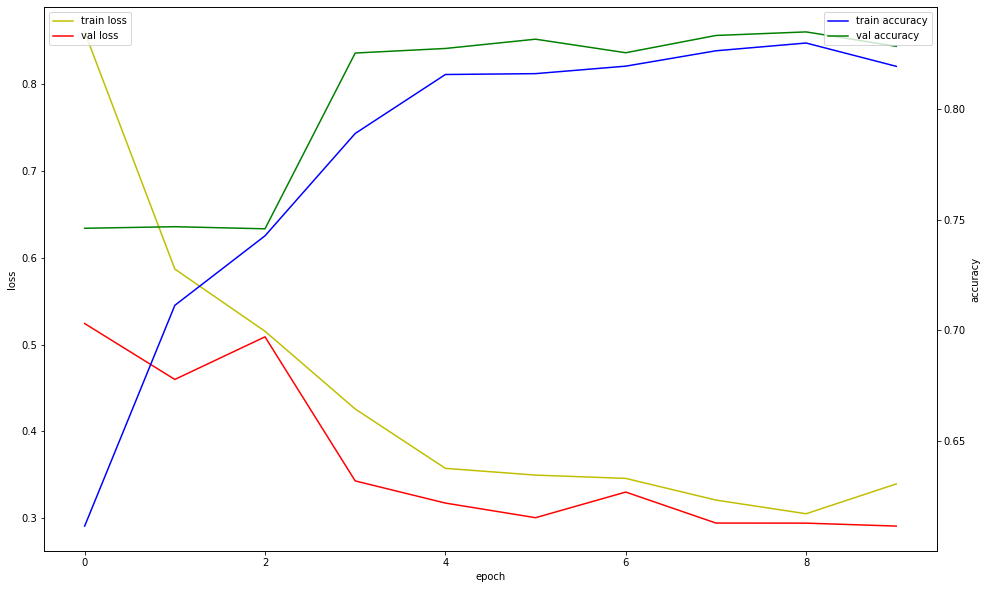

In [31]:
fig, loss_ax = plt.subplots(figsize = (16,10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [34]:
model.save('model_GRU.h5')

In [35]:
new_model = tf.keras.models.load_model('model_GRU.h5')

In [36]:
Y_test.shape

(248015, 9)

In [37]:
X_test.shape

(248015, 20, 26)

In [38]:
test_loss, test_acc = new_model.evaluate(X_test, Y_test, verbose=1)

7751/7751 [==============================] - 13s 2ms/step - loss: 0.2908 - accuracy: 0.8286


In [39]:
y_pred = new_model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets